> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I select TMDb Movies Database. This database contains information of more than 10,0000 movie which include revenue, budget, ratings and runtimes. I choose to show top 5 records to have preview about the columns and structure of th edatabse.

> Question I feel quiruouse to know are:
Q1) which movies gain highest & lowest revenue (Profit)?
Q2) What is the shortest & longest movie?
Q3) what is average runtime?
Q4) Is there relation between year of released and profit?
Q5) Is there relation between year of released and number of movies?


In [113]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sb

myData = pd.read_csv('tmdb-movies.csv')

#show first five rows
myData.head()

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## My Observation 
> Before I start working I checked the database, I notice that: 
1- release date format is diffrent from row to row, I need to nuify the format 
2- Production company is missing from some record. I plan to set Null value if the data is missing 
3- Vote count is vary from row to row. and this effect rating column as we can not consider the movie with high rating is successful were the voter is very few.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

In [52]:
# check datatypes of columns and missing values.
myData.info()
myData.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [53]:

# check number of rows in database
row, col= myData.shape

#show number of rows and columns
#rows include header so we write rows-1
print("database have {} rows and {} column".format(row-1, col))

# check if there is duplicated rows
num_dup_rows=sum(myData.duplicated())
print('there is total of {} dulicated row'.format(num_dup_rows))


database have 10865 rows and 21 column
there is total of 1 dulicated row


### General Properties

#### What I will do?
##### 1- Remove unnecessory column like tag, keyword,  overview, home page 
##### 2- Convert release date to standard format
##### 3- Check for duplication and remove duplicated record
##### 4- Remove 0'z from budget and revenue to easy reading and visualization

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [54]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#  Remove unnecessory column like tag, keyword,  overview, imdb_id, home page 
del_col = [ 'tagline', 'keywords', 'overview', 'homepage', 'imdb_id']
cleanedData=myData.drop(del_col,1)
cleanedData.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [55]:
#Convert release date to standard format
cleanedData.release_date = pd.to_datetime(myData['release_date'])

In [56]:
#Remove duplicated row
cleanedData.drop_duplicates(keep ='first', inplace=True)

In [57]:
#replacing 0 with NaN then delete rows with NaN value
budRev_list=['budget', 'revenue']
cleanedData[budRev_list] = cleanedData[budRev_list].replace(0, py.NAN)
cleanedData.dropna(subset = budRev_list, inplace = True)

In [58]:
#check number of rows after cleaning 
row, col= cleanedData.shape
print("database have {} rows and {} column".format(row-1, col))


database have 3853 rows and 16 column


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (which movies gain highest & lowest revenue (Profit)?)

In [59]:
# add new column for profit
cleanedData.insert(2,'final_profit',cleanedData['revenue']-cleanedData['budget'])
cleanedData.head(5)

,id,popularity,final_profit,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,1.868178e+09,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1.316249e+09,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [60]:
import pprint

# define function return the lowest and highst row for any givin 
# column
def cal_high_low(col):
    
    #find highest
    high_ind= cleanedData[col].idxmax()
    high_row=pd.DataFrame(cleanedData.loc[high_ind])
    
    #find lowest
    low_ind=cleanedData[col].idxmin()
    low_row= pd.DataFrame(cleanedData.loc[low_ind])
    
    high_low_tbl=pd.concat([high_row, low_row], axis = 1)
                          
    return high_low_tbl

cal_high_low('final_profit')


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
final_profit,2.54451e+09,-4.13912e+08
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


### Research Question 2  (What is the shortest & longest movie?)

In [61]:
#call cal_high_low function
cal_high_low('runtime')

,2107,5162
id,43434,24914
popularity,0.534192,0.208637
final_profit,-1.71287e+07,-5
budget,1.8e+07,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation


### Research Question 3  ( what is average runtime?)

109.22029060716139

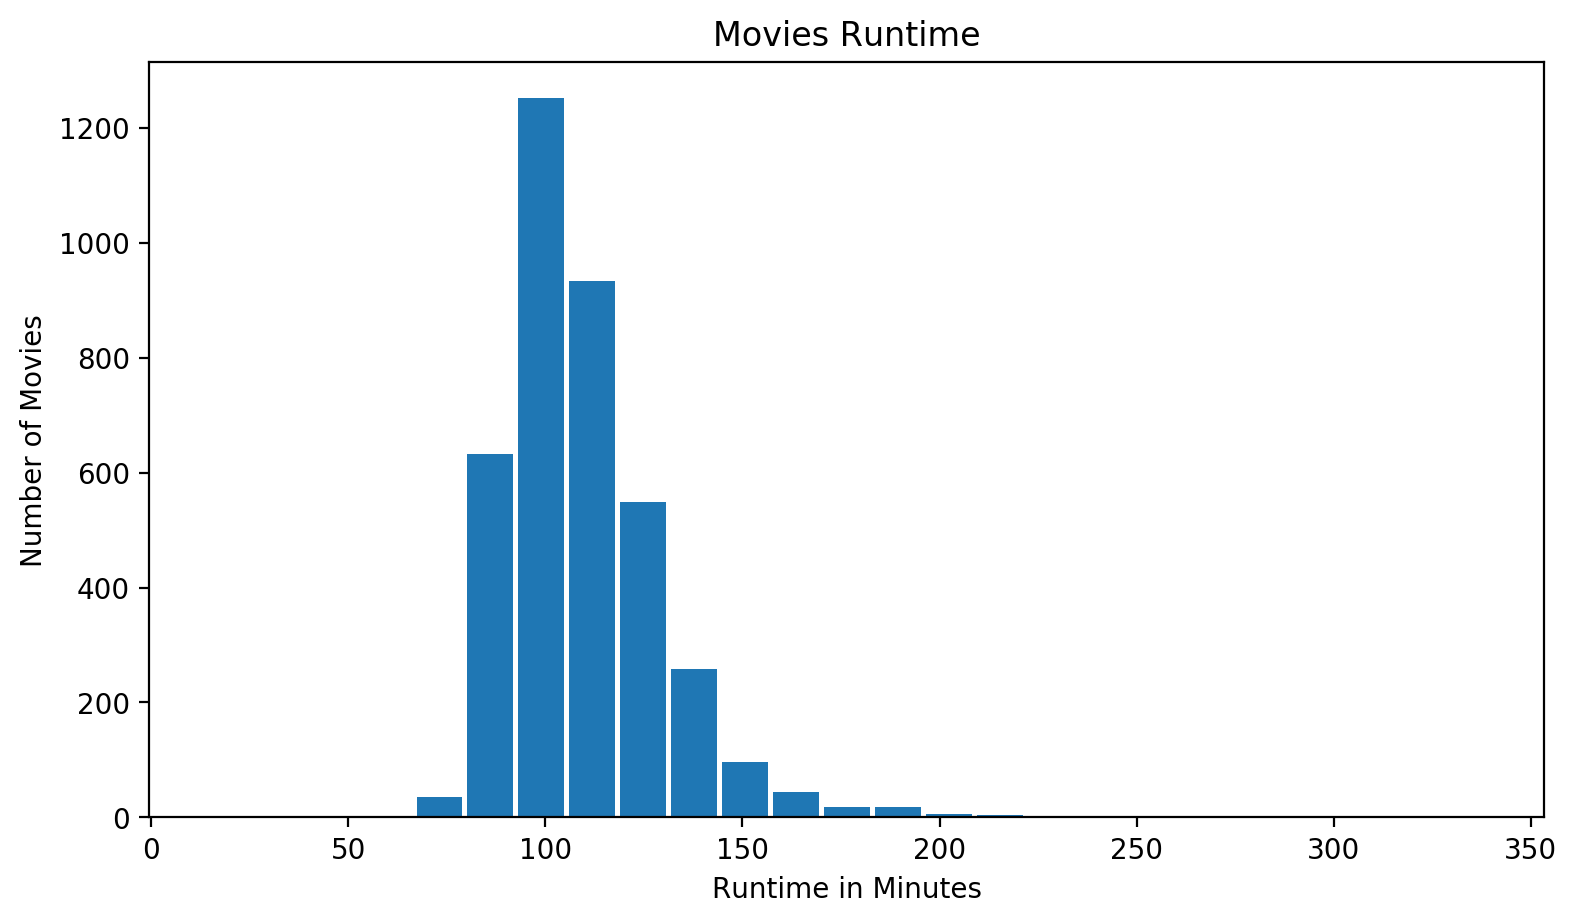

In [62]:
def cal_avg(col):
    
    return cleanedData[col].mean()

#show runtime of all movies in chart
plt.figure(figsize=(9,5), dpi = 200)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Number of Movies')
plt.title('Movies Runtime')
plt.hist(cleanedData['runtime'], rwidth = 0.9, bins = 25)

#show the average of runtime
cal_avg('runtime')


> The distribution of the above graph is right skewed with long tail. The run time of most of movies are between 80 minutes to 125 minutes where the majority has 100 minutes and the average of runtime is 109.22 minutes 

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

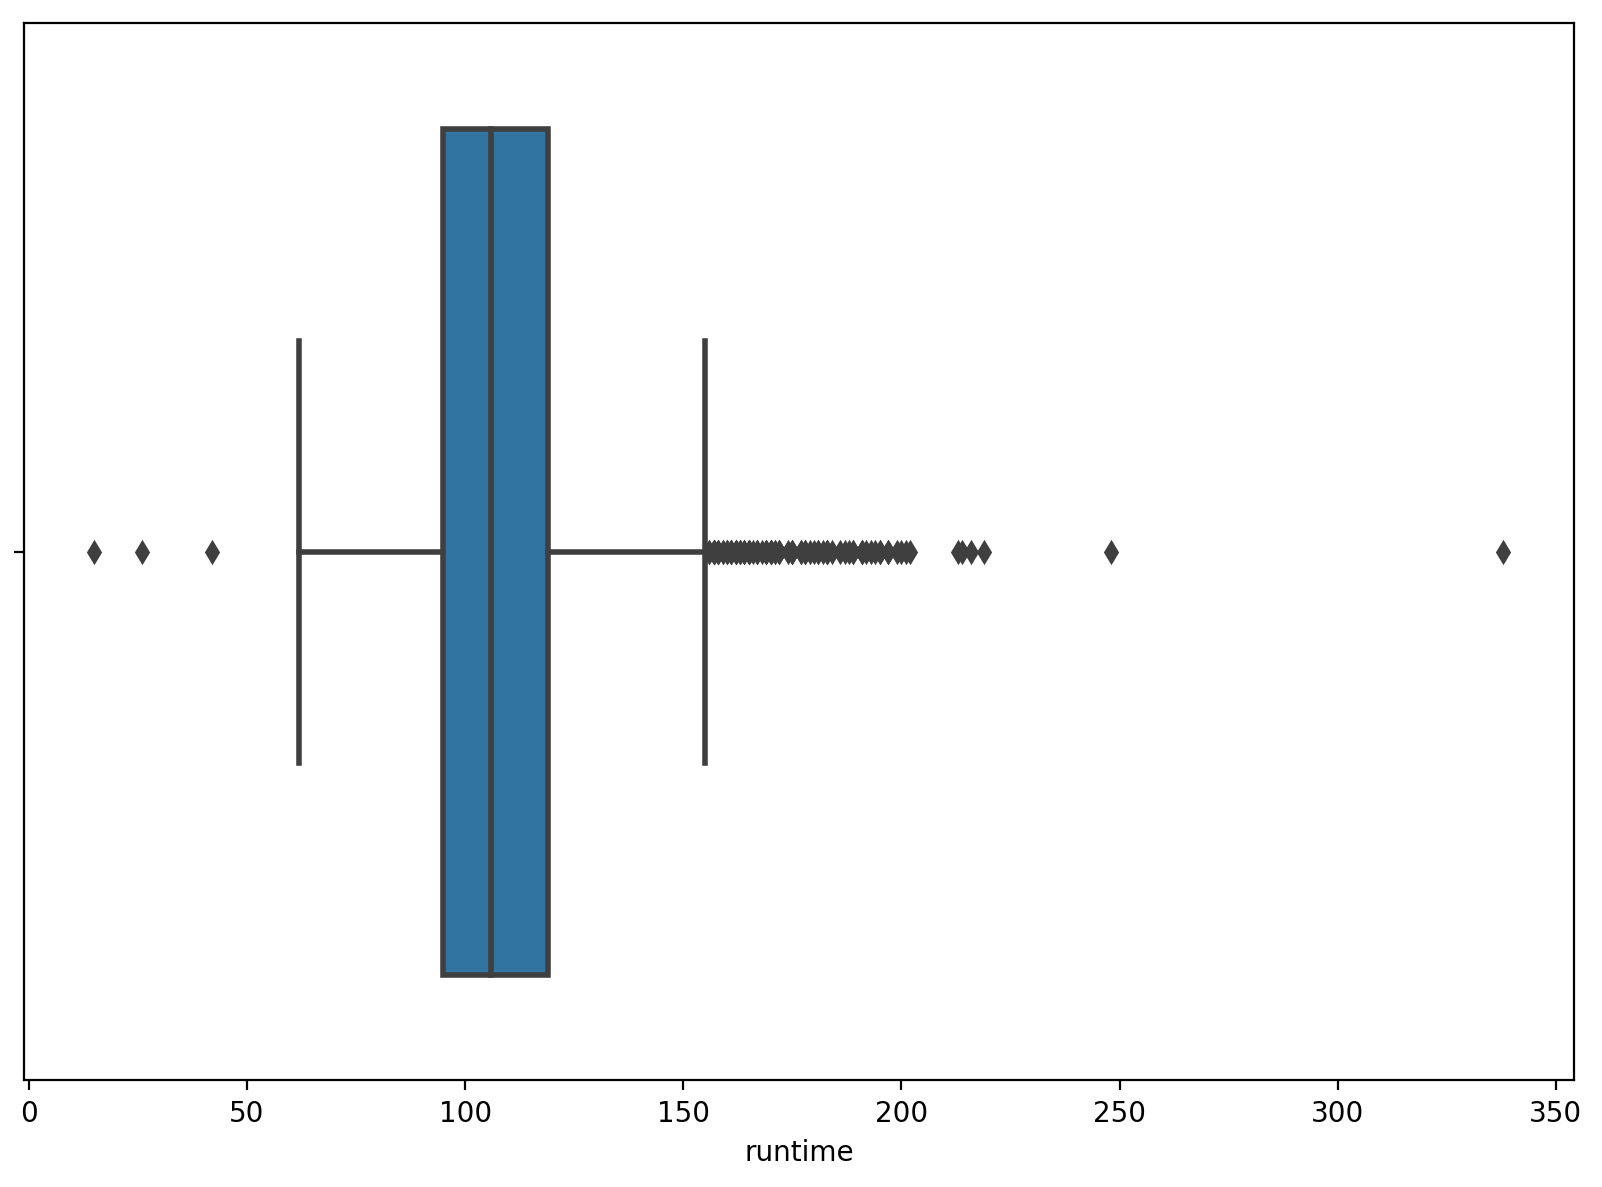

In [117]:
#show outlier of runtime of all movies 
plt.figure(figsize=(10,7), dpi = 200)
sb.boxplot(cleanedData['runtime'], linewidth = 2)

cleanedData['runtime'].describe()

> The above graph give a visualization for data distribution range. We can see that 50% of the data larger than 109 and 50% less than 109. the runtime of 25% of movies is less than 95 minutes. and 

### Research Question 4  ( Is there relation between year of released and profit)

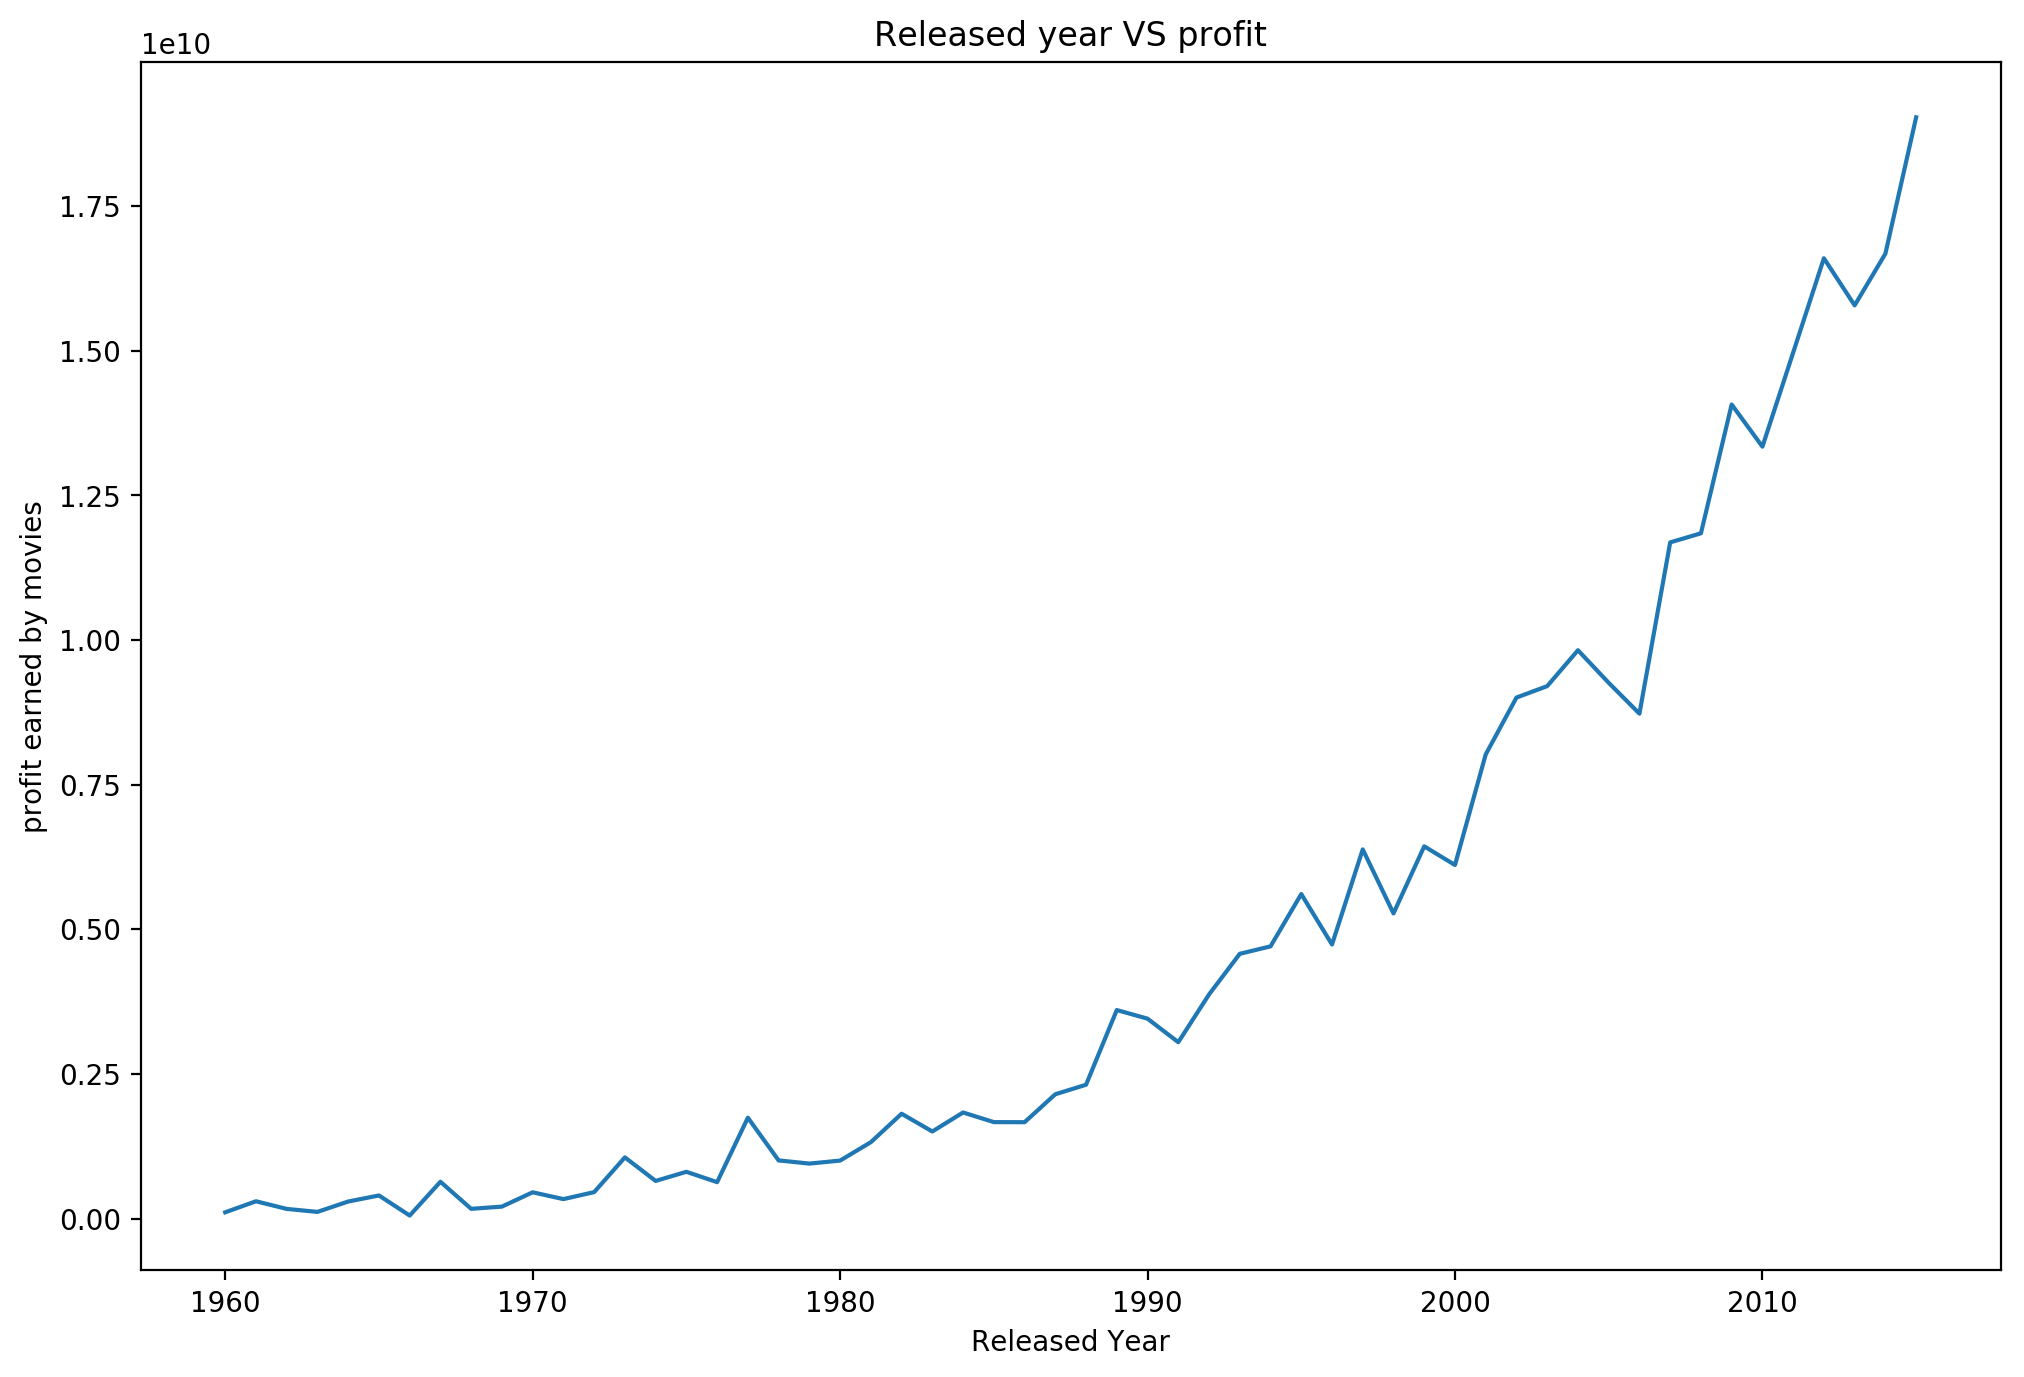

In [63]:
# group data based on released year 
profit_year_data=cleanedData.groupby('release_year')['final_profit'].sum()

#show relation between released year and profit in chart
plt.figure(figsize=(12,8), dpi = 200)
plt.xlabel('Released Year')
plt.ylabel('profit earned by movies')
plt.title('Released year VS profit')
plt.plot(profit_year_data)
plt.show()


> As the above graph the peak is in 2015. Also we can see in some year the profit is 0 because there are movies with negative profit (loss). Overall, the marke of movies are in growth.

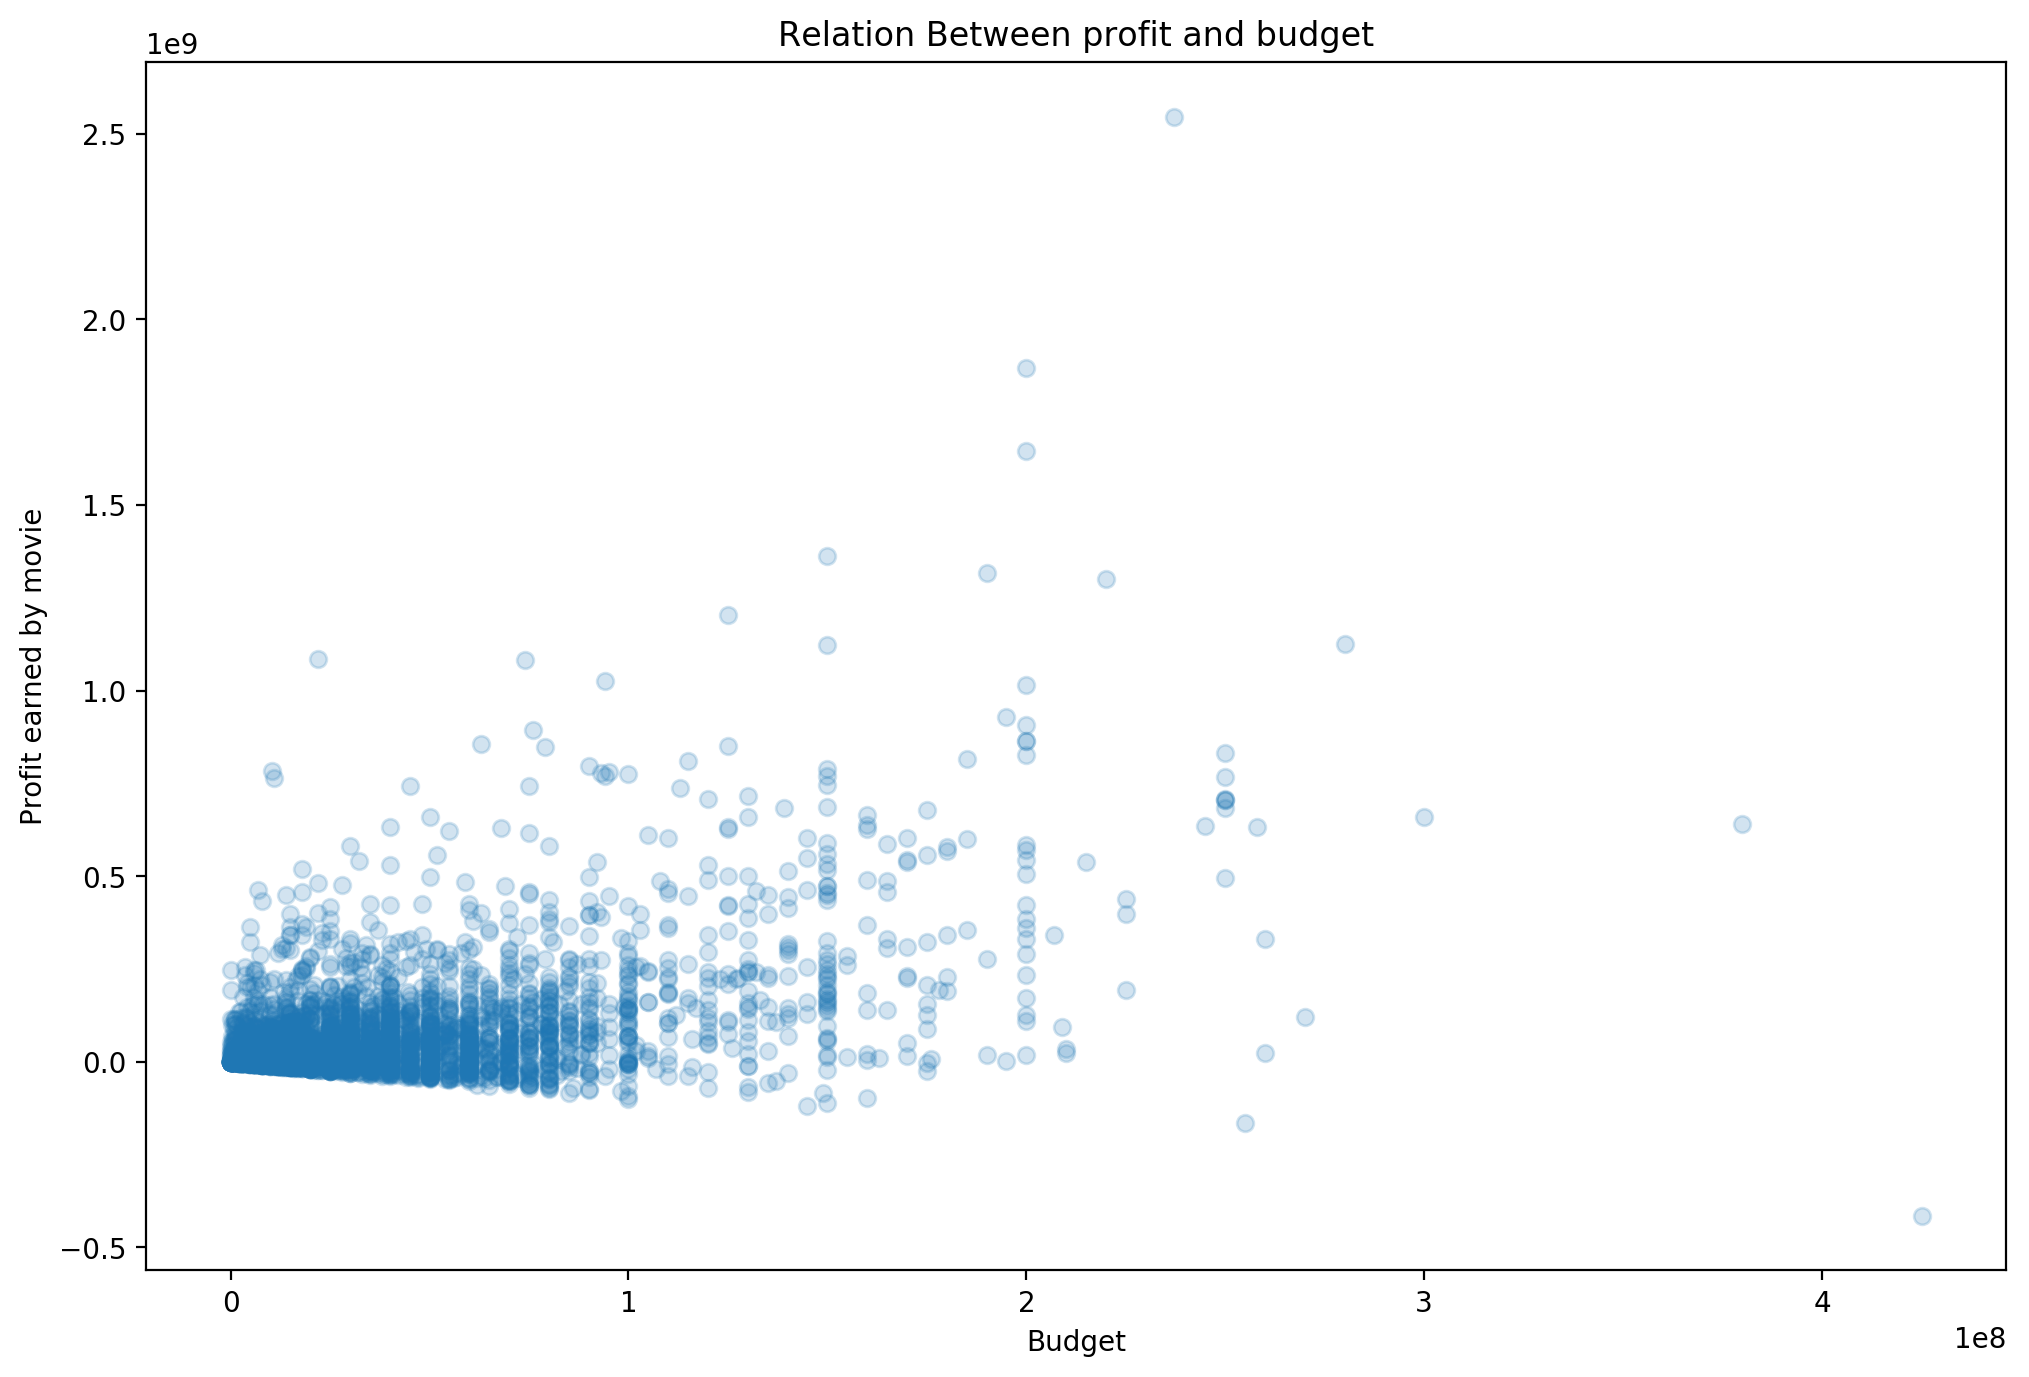

In [64]:
#show scatterplot of runtime of all movies 
plt.figure(figsize=(12,8), dpi = 200)
plt.xlabel('Budget')
plt.ylabel('Profit earned by movie')
plt.title('Relation Between profit and budget')
plt.scatter(cleanedData['budget'], cleanedData['final_profit'], alpha=0.2)
plt.show()


> the above graph shows that most of movies that have budget less than 100000000 earned less than 5000000000. Also when the extremly increase (more than 250000000) the profit does not increase with same percentage. I notice also all movies with budget more than 400000000 are loss. 

### Research Question 5  ( Is there relation between year of released and number of movies)

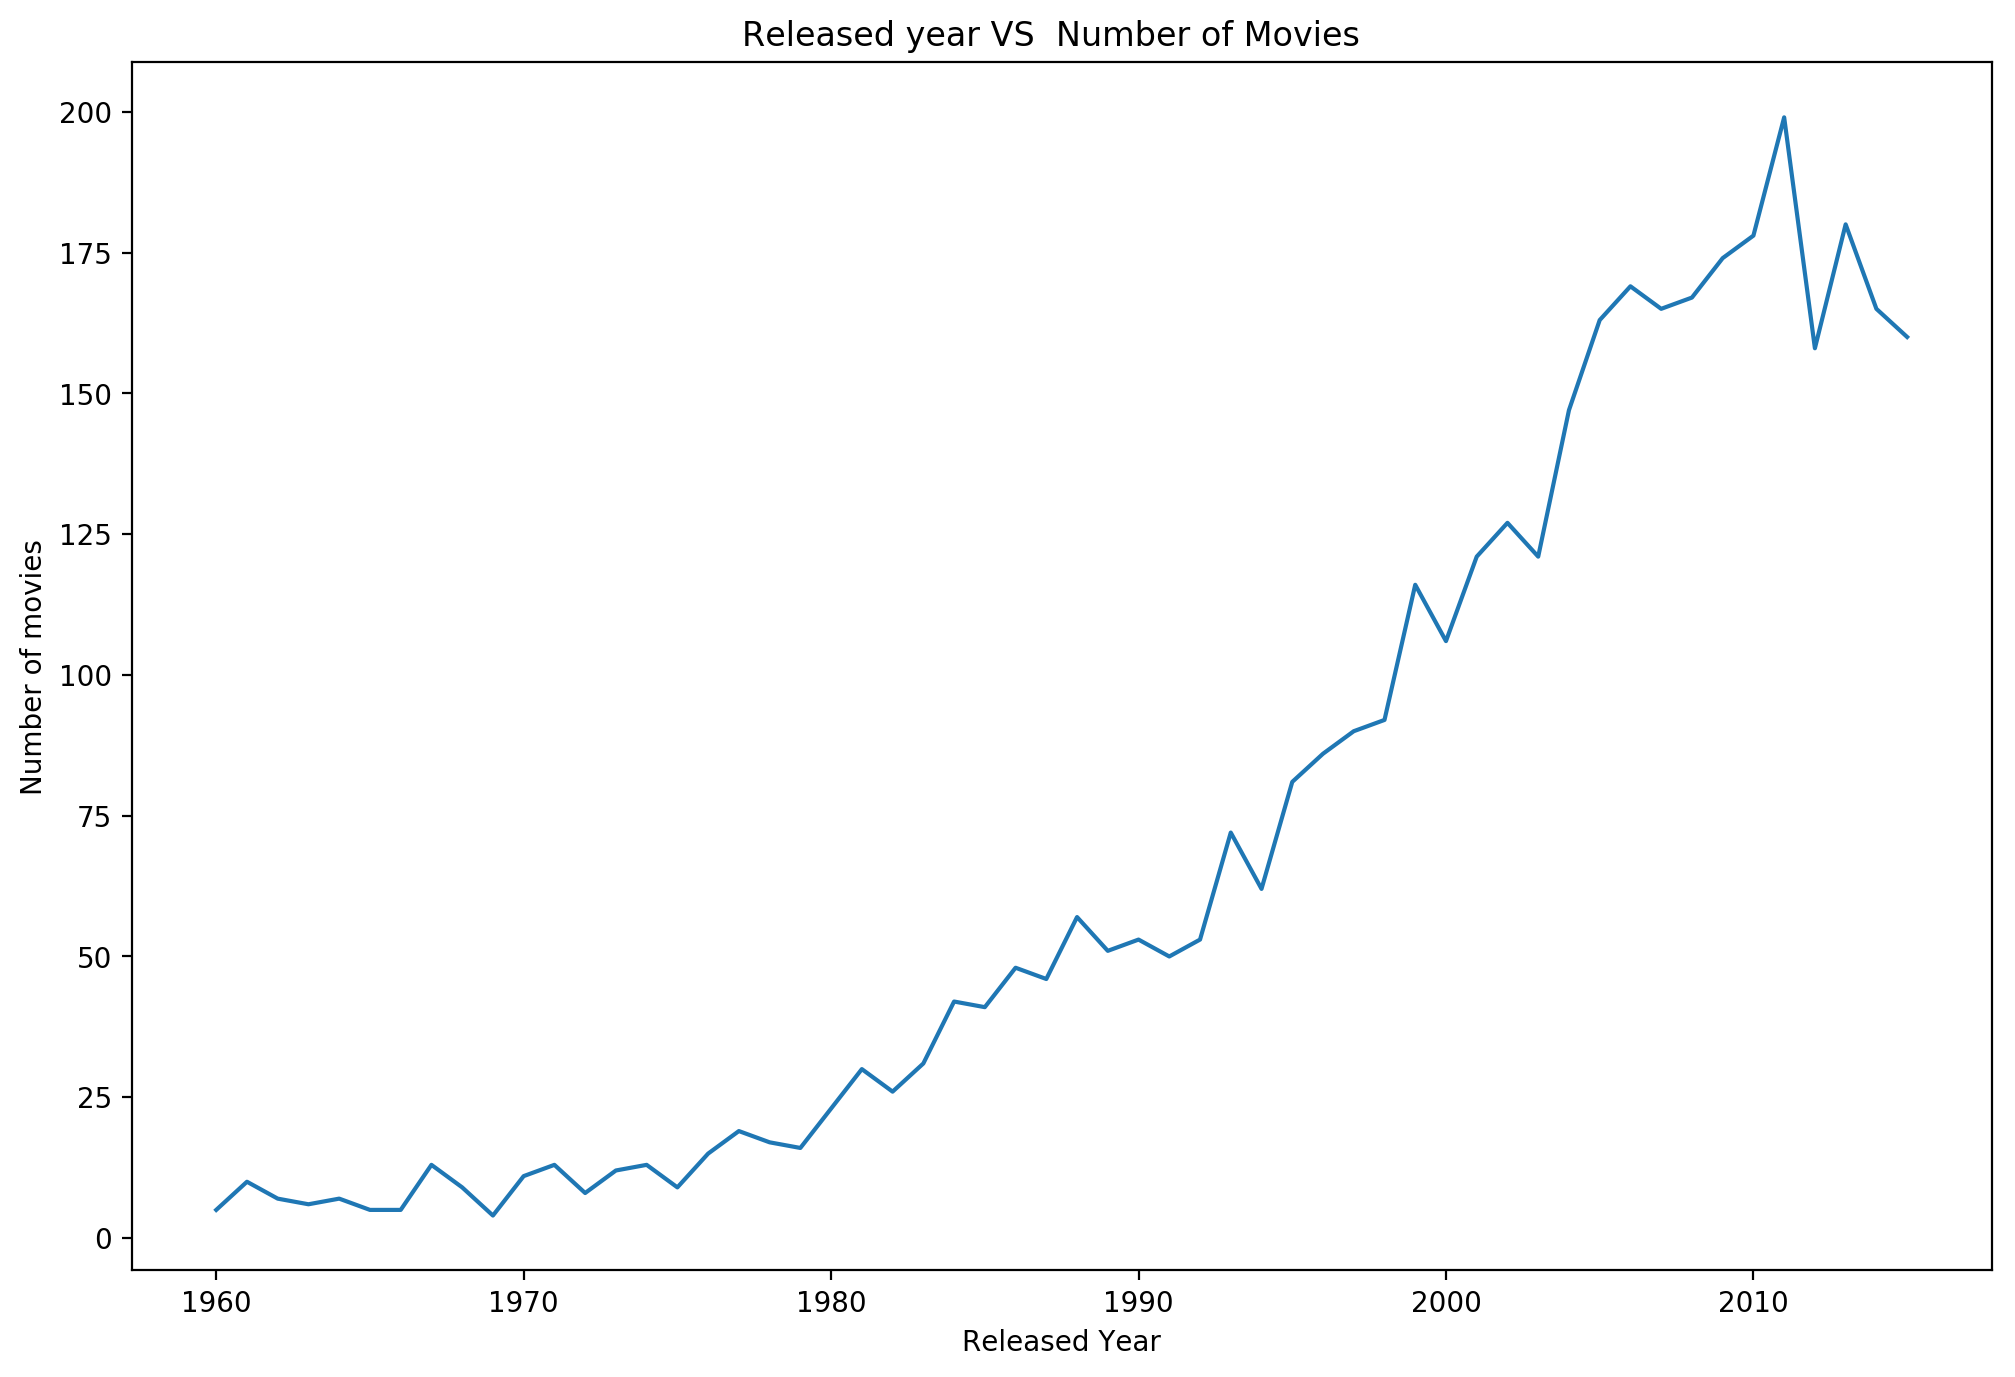

In [65]:
# group data based on released year 
movie_year_data=cleanedData.groupby('release_year')['id'].count()

#show relation between released year and profit in chart
plt.figure(figsize=(12,8), dpi = 200)
plt.xlabel('Released Year')
plt.ylabel('Number of movies')
plt.title('Released year VS  Number of Movies  ')
plt.plot(movie_year_data)
plt.show()

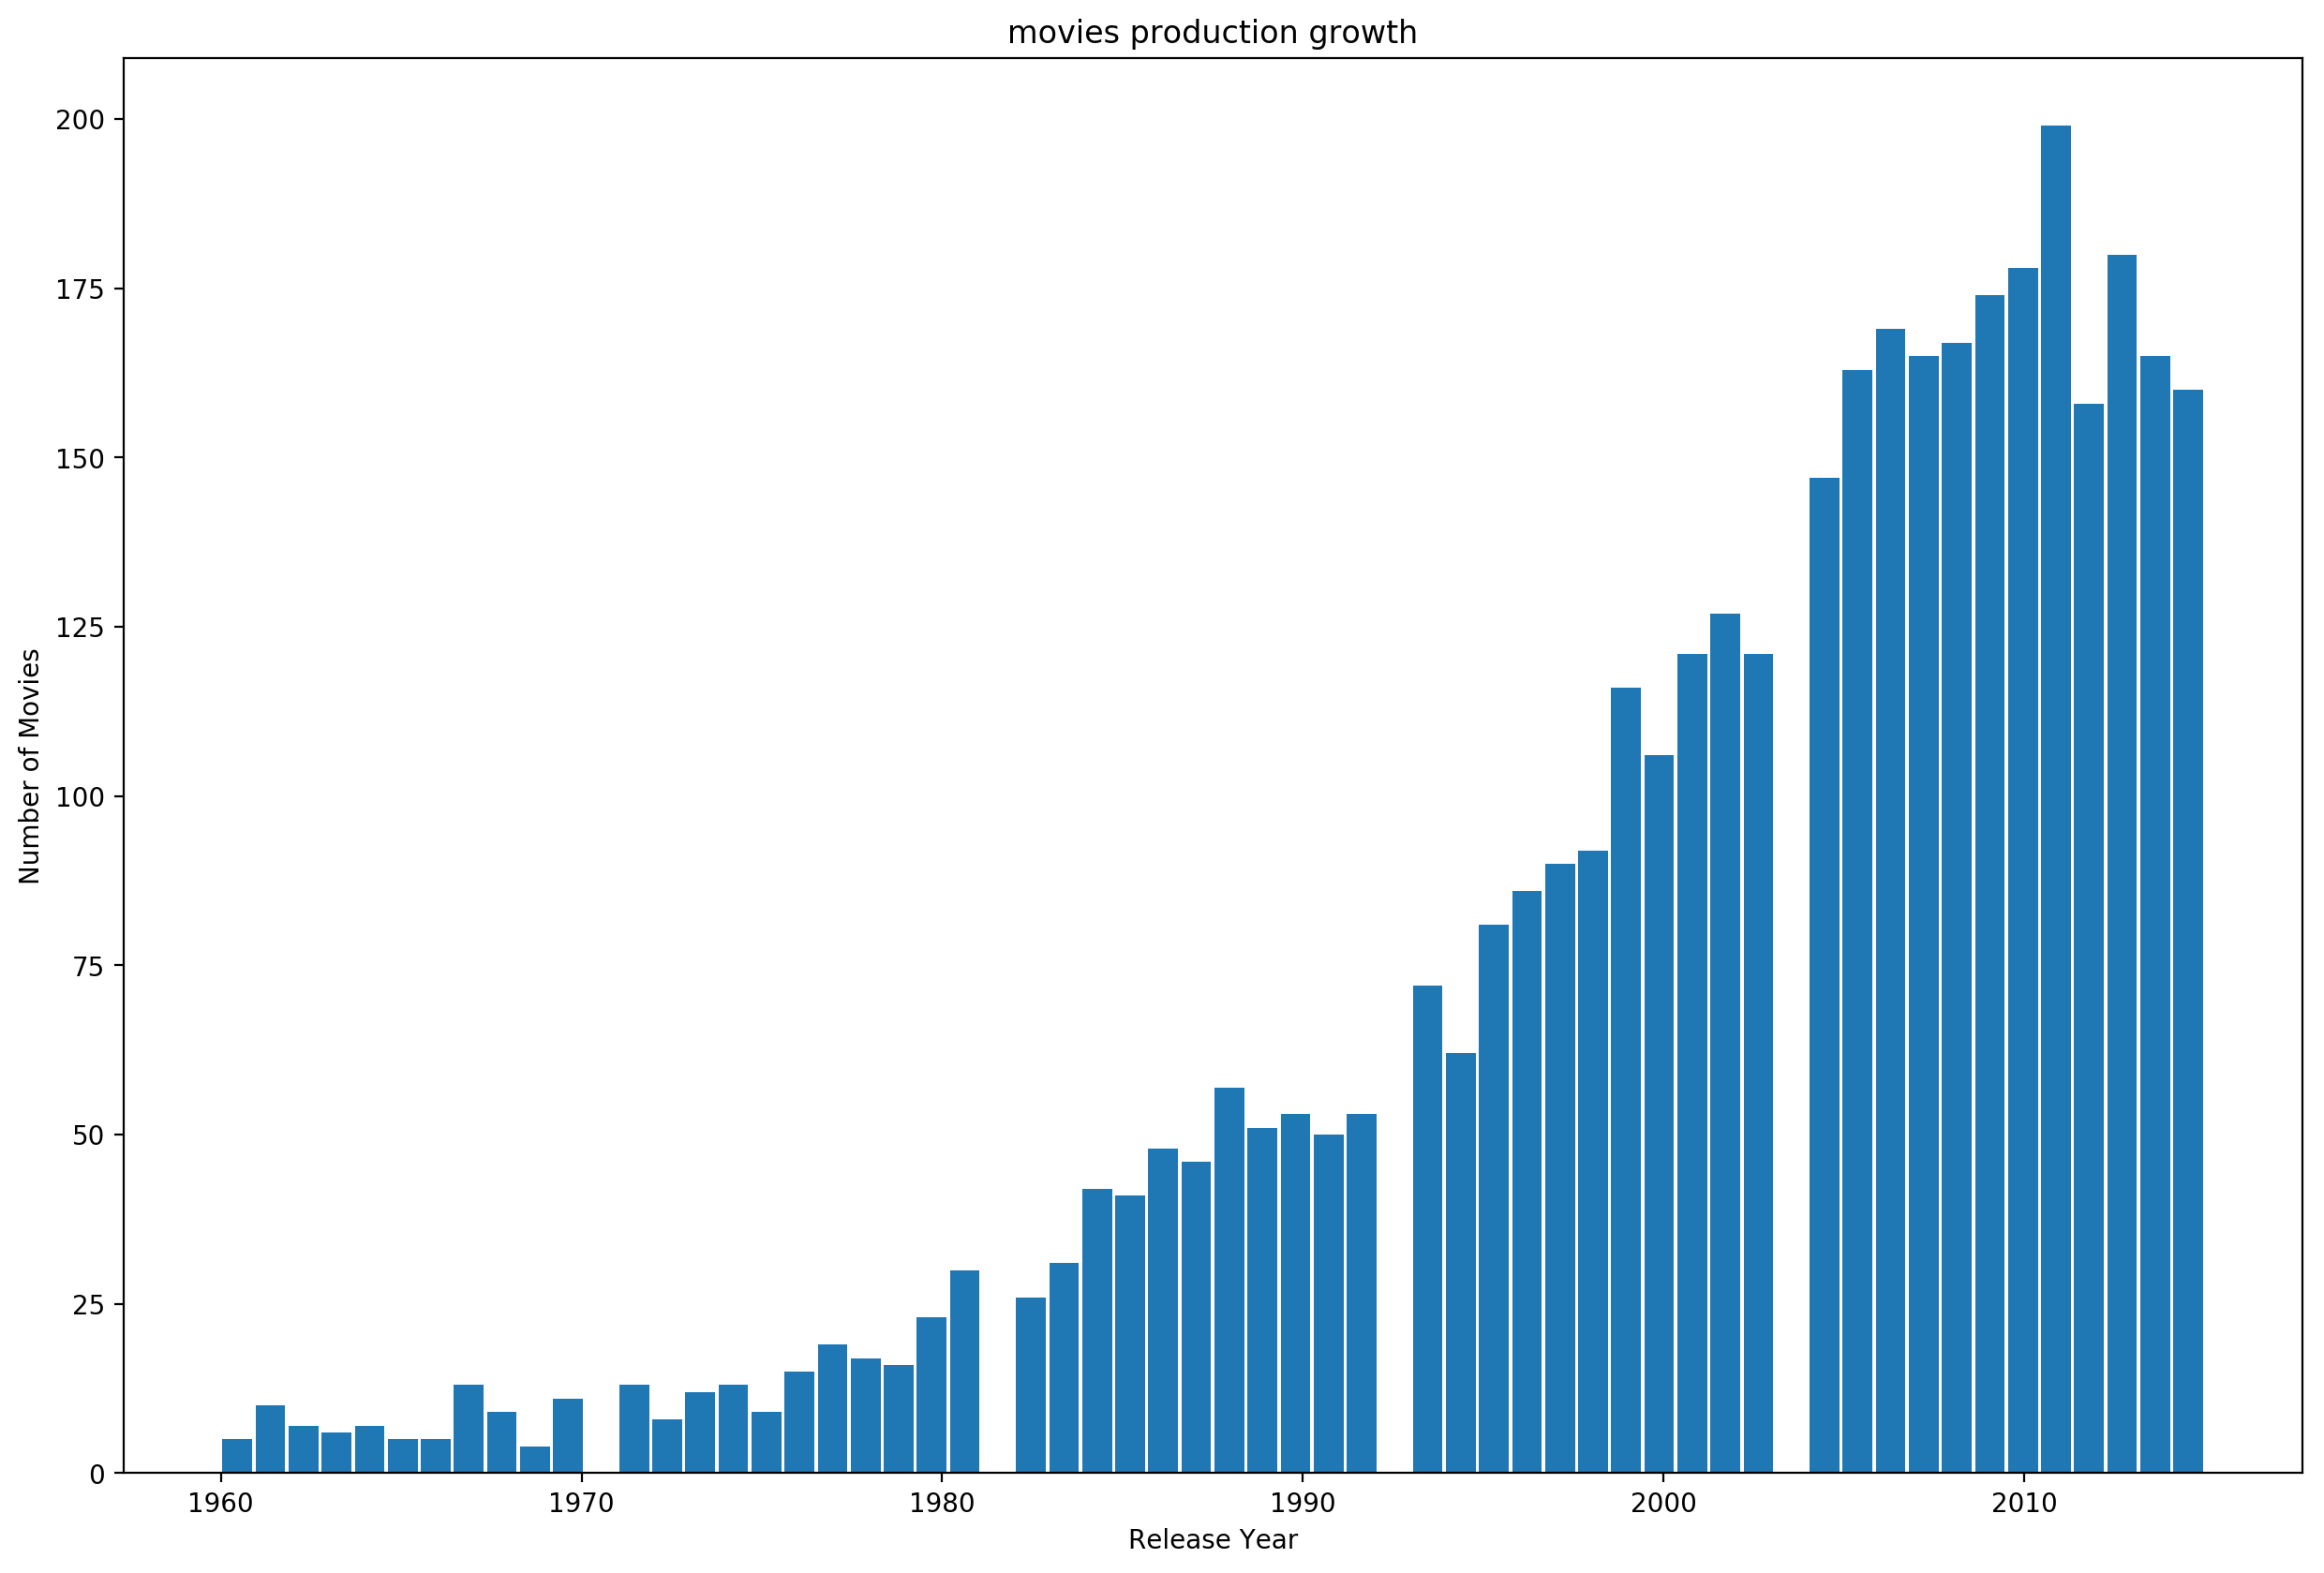

In [111]:
#show runtime of all movies in chart
plt.figure(figsize=(15,10), dpi = 200)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('movies production growth')
plt.hist(cleanedData['release_year'],rwidth = 0.9, bins=60)
plt.show()

The market of the movies are growing year after year. since 1990, the number of produced movies are increasing rapidly. The peak is in 2011.

<a id='conclusions'></a>
## Conclusions

>This was very intersting dataset, I enjoyed working on it.

> some result wa supprized like that there is a movie with 338 minutes which is more than 6 hours. Also lowest profit movie was supprized for me. 

> in the other side some result was expected like average time of movies 109 minutes. 

> Also for the profit growth of movie over years although the graph showing that there is growth in the earned profit but comparing with other graph which show also there is increaseing in the number of movies by years. so this lead to the growth of earned profit scince the profit calculated by the summition of all profit earned by all movies in the year. 

> I was plan to be able to show the relation between the profit and genres and I try for long time but with no luck. I think that was because there is more than one genres of each movies so either we will duplicated the rows which is not good or if we select one genres for each movie which is not right.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

#### Limitation: 
> This analysis is not accurate 100% as we are not sure if the data provided are correct complated and formated. Morever, for the analysis of movie profit, we calculate profit based on revenue and budget and these columns have no currency. 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0